<a href="https://colab.research.google.com/github/Aman811630/Customer-Churn-Prediction-Classification-Project/blob/main/Customer_Churn_Prediction_BY_Aman_Singh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Customer Churn Prediction  BY Aman Singh

### Data Preprocessing

In [47]:
# importing Important libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

# importing all needed ML model

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

from sklearn.ensemble import RandomForestClassifier

In [3]:
# Loading my Data from my Drive (mountingg my Drive)

df = pd.read_csv('/content/drive/MyDrive/customer_churn_large_dataset.csv')
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [4]:
df.shape , df.size

((100000, 9), 900000)

In [5]:
df.info() # checking dtypes of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [6]:
# Checking for missing values
a=df.isnull().sum()
a

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

<Axes: >

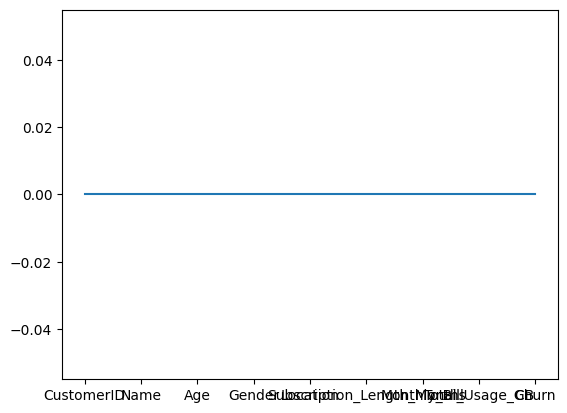

In [7]:
# visulising missinng values

a.plot()

no missing values present


In [8]:
# Statistical Information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,100000.0,50000.500000,28867.657797,1.0,25000.75,50000.50,75000.25,100000.0
Age,100000.0,44.027020,15.280283,18.0,31.00,44.00,57.00,70.0
Subscription_Length_Months,100000.0,12.490100,6.926461,1.0,6.00,12.00,19.00,24.0
Monthly_Bill,100000.0,65.053197,20.230696,30.0,47.54,65.01,82.64,100.0
Total_Usage_GB,100000.0,274.393650,130.463063,50.0,161.00,274.00,387.00,500.0
Churn,100000.0,0.497790,0.499998,0.0,0.00,0.00,1.00,1.0


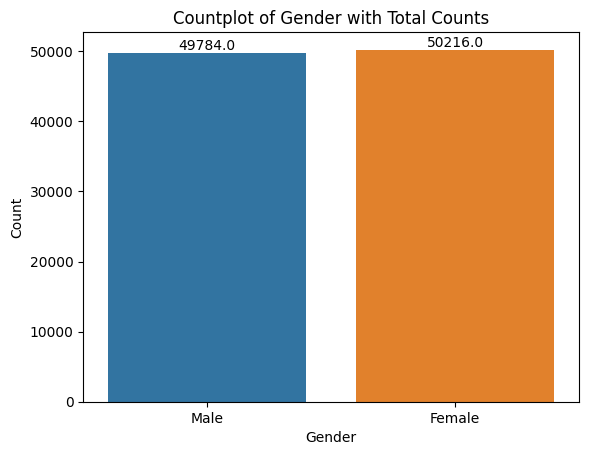

In [9]:
# counting the total numbers of Males and Female

# Visulization

ax = sns.countplot(x='Gender', data=df)

# Display count values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title("Countplot of Gender with Total Counts")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

male count = 49784

Female count = 50216

In [10]:
# Counting the Gender with respect to Churn customers.

df.groupby(['Gender', "Churn"]).size()


Gender  Churn
Female  0        25272
        1        24944
Male    0        24949
        1        24835
dtype: int64

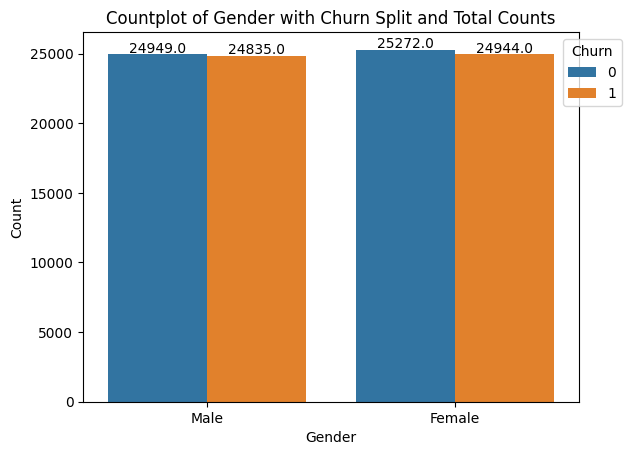

In [11]:
# Visulization

ax = sns.countplot(x='Gender', hue='Churn', data=df)

# Display count values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 4), textcoords='offset points')

plt.title("Countplot of Gender with Churn Split and Total Counts")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='Churn', loc = 'upper right', bbox_to_anchor=(1.1, 1))
plt.show()

Gender  Churn

**Female**

 0    =     25272

 1   =     24944

**Male**

0  =      24949  

1    =    24835

In [12]:
# Location wise Churn

df.groupby(['Location','Churn']).size()

Location     Churn
Chicago      0        10013
             1         9945
Houston      0        10258
             1         9899
Los Angeles  0        10161
             1         9880
Miami        0         9955
             1        10076
New York     0         9834
             1         9979
dtype: int64

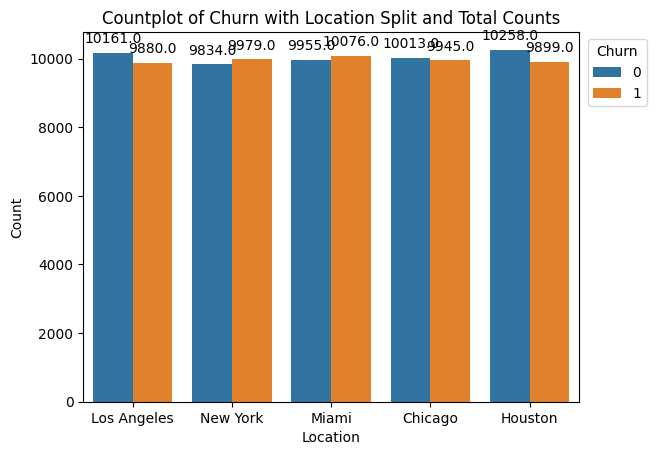

In [17]:
# Visulization

ax = sns.countplot(x = df.Location, hue = df.Churn);

# Display count values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title("Countplot of Churn with Location Split and Total Counts")
plt.xlabel("Location")
plt.ylabel("Count")
plt.legend(title='Churn', loc = 'upper right', bbox_to_anchor=(1.15, 1))
plt.show()

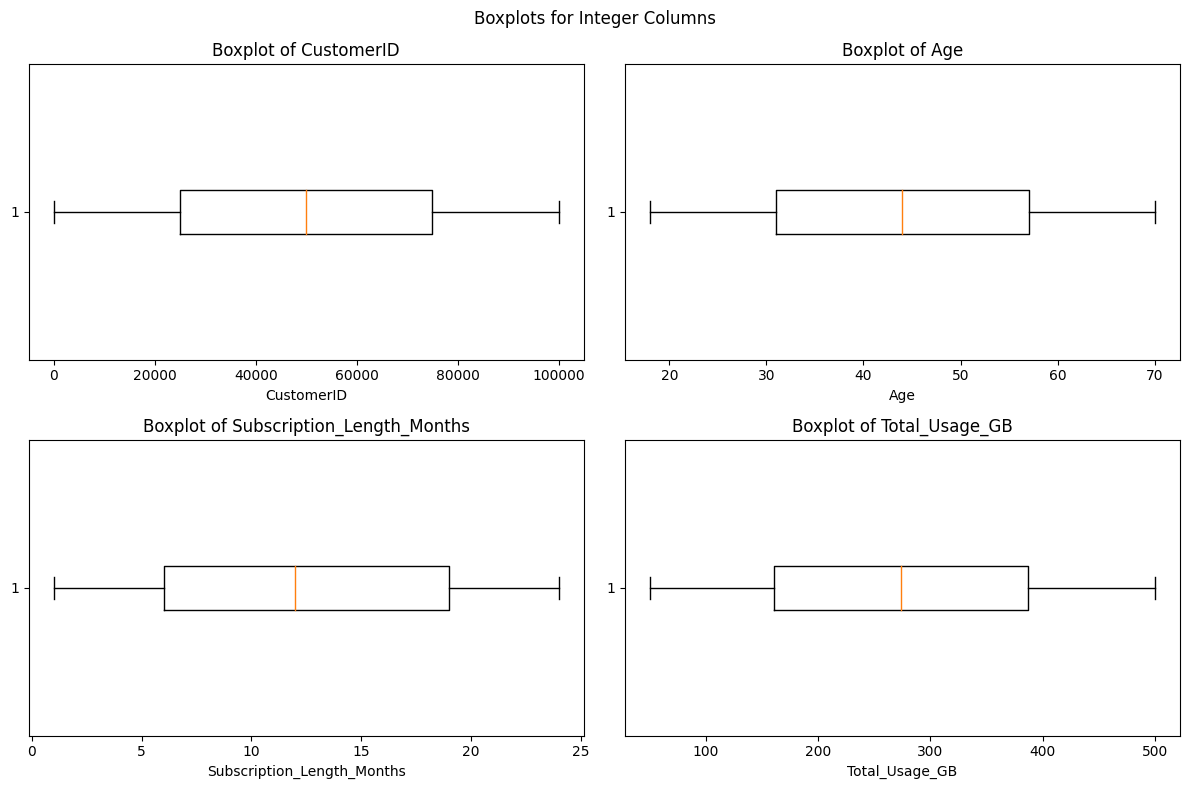

In [18]:
# Checking Outlier

# Select integer columns from the DataFrame
column = df.iloc[:,:-1].select_dtypes(int)

# Define the layout for subplots
num_rows = 2
num_cols = 2
total_plots = num_rows * num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
fig.suptitle("Boxplots for Integer Columns")

# Flatten the 2D axes array for easier iteration
axes = axes.flatten()

# Loop through columns and create boxplots in subplots
for i, col in enumerate(column):
    ax = axes[i]
    ax.boxplot(df[col], vert = False )
    ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel(col)


# Hide any unused subplots
for i in range(len(column), total_plots):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Observation :- No outlier is found .

In [19]:
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


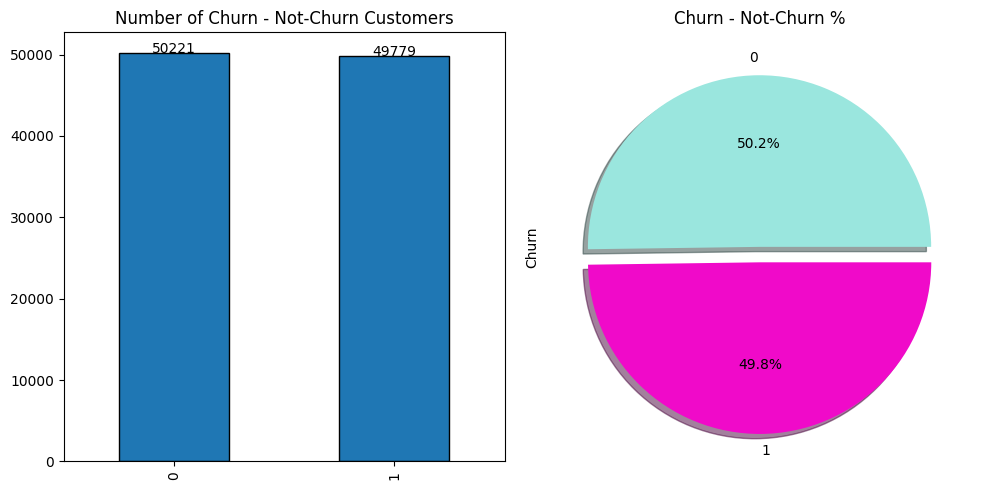

In [22]:
# Visualizing the Target column (i.e) Churn Column = Target Column

# calculate churn ratio
churn_ratio = df['Churn'].value_counts(normalize=True) * 100

# create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
colors = ['#9ae6de', '#f00ac9']
# get values counts
counts = df.Churn.value_counts()

# plot the bar chart on the first axis
counts.plot(kind='bar', ax=axs[0], edgecolor = 'black')
axs[0].set_title('Number of Churn - Not-Churn Customers')

# Add total counts as text inside the bars:
for i, count in enumerate(counts):
    axs[0].text(i, count+10,count, ha = 'center')


# plot the pie chart on the second axis
df.Churn.value_counts().plot(kind='pie', ax=axs[1], autopct='%1.1f%%', explode=(0,0.09), shadow = True, colors = colors)
axs[1].set_title('Churn - Not-Churn %')

# adjust the layout
plt.tight_layout()

# show the plot
plt.show()

From above plot we can see that out datset is balance dataset.

###  Featuring Engineering

In [23]:
# Create categorical age groups from the 'Age' feature.
def categorize_age(age):
    if age < 18:
        return 'Under 18'
    elif age < 30:
        return '18-29'
    elif age < 40:
        return '30-39'
    elif age < 50:
        return '40-49'
    elif age < 60:
        return '50-59'
    else:
        return '60+'

df['Age_Group'] = df['Age'].apply(categorize_age)

In [24]:
# Calculate the ratio of 'Subscription_Length_Months' to 'Total_Usage_GB'.

df['Subscription_to_Usage_Ratio'] = df['Subscription_Length_Months'] / df['Total_Usage_GB']

In [25]:
# Calculate the average monthly bill by dividing 'Monthly_Bill' by 'Subscription_Length_Months'.

df['Average_Monthly_Bill'] = df['Monthly_Bill'] / df['Subscription_Length_Months']

In [26]:
# Convert the 'Gender' categorical feature into numerical format using label encoding
# (assuming 'Male' as 1 and 'Female' as 0).

df["Gender"] = df['Gender'].map({"Female":0, "Male": 1})


In [27]:
# Convert the 'Location' categorical feature into numerical format using one-hot encoding.

location_dummies = pd.get_dummies(df['Location'], prefix='Location', drop_first = True)
df = pd.concat([df, location_dummies], axis=1)

In [29]:
df.head(3)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Age_Group,Subscription_to_Usage_Ratio,Average_Monthly_Bill,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,1,Customer_1,63,1,Los Angeles,17,73.36,236,0,60+,0.072034,4.315294,0,1,0,0
1,2,Customer_2,62,0,New York,1,48.76,172,0,60+,0.005814,48.760000,0,0,0,1
2,3,Customer_3,24,0,Los Angeles,5,85.47,460,0,18-29,0.010870,17.094000,0,1,0,0


In [32]:
df.shape

(100000, 16)

In [34]:
# checking different age group I made
df.Age_Group.unique()

array(['60+', '18-29', '30-39', '40-49', '50-59'], dtype=object)

In [35]:
df['Age_Group'] = df['Age_Group'].map({'18-29':1, '30-39':2, '40-49':3, '50-59': 4, "60+": 5})
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Age_Group,Subscription_to_Usage_Ratio,Average_Monthly_Bill,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,1,Customer_1,63,1,Los Angeles,17,73.36,236,0,5,0.072034,4.315294,0,1,0,0
1,2,Customer_2,62,0,New York,1,48.76,172,0,5,0.005814,48.760000,0,0,0,1
2,3,Customer_3,24,0,Los Angeles,5,85.47,460,0,1,0.010870,17.094000,0,1,0,0
3,4,Customer_4,36,0,Miami,3,97.94,297,1,2,0.010101,32.646667,0,0,1,0
4,5,Customer_5,46,0,Miami,19,58.14,266,0,3,0.071429,3.060000,0,0,1,0


In [36]:
# Droping off unnecessary columns.

df.drop(['CustomerID','Name','Age', 'Location'], axis = 1, inplace = True)

In [37]:
from sklearn.preprocessing import StandardScaler
# Feature Scaling
# Select the features for scaling

features_to_scale = ['Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', "Average_Monthly_Bill"]

# Initialize the scaler
scaler = StandardScaler()

# Scale the selected features
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Display the modified dataframe
df.head()

,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Age_Group,Subscription_to_Usage_Ratio,Average_Monthly_Bill,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,1,0.651115,0.410606,-0.294289,0,5,0.072034,-0.413328,0,1,0,0
1,0,-1.658879,-0.805374,-0.784852,0,5,0.005814,2.650731,0,0,0,1
2,0,-1.081380,1.009204,1.422681,0,1,0.010870,0.467648,0,1,0,0
3,0,-1.370129,1.625597,0.173279,1,2,0.010101,1.539863,0,0,1,0
4,0,0.939864,-0.341720,-0.064338,0,3,0.071429,-0.499869,0,0,1,0


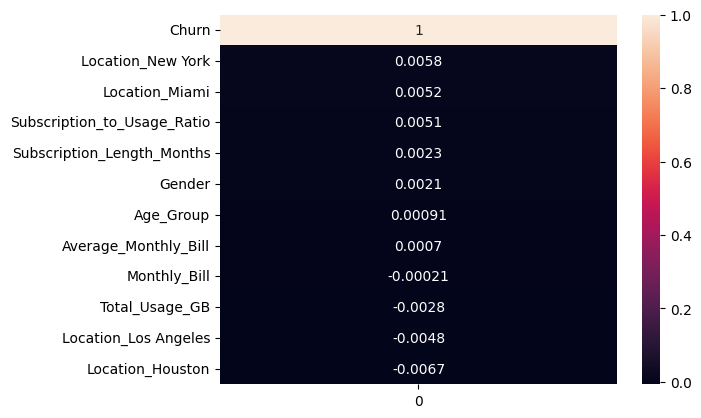

In [38]:
# Visulization by heat map

sns.heatmap(df.corrwith(df.Churn).sort_values(ascending = False).to_frame(), annot = True);

In [39]:
# Define features and target variable

X = df.drop('Churn', axis=1)
y = df['Churn']

making Train Test set

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information classifier.

mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.00623338, 0.00112188, 0.        , 0.        , 0.00063365,
       0.        , 0.00246656, 0.00063525, 0.00180284, 0.00383268,
       0.00059503])

In [42]:
mutual_info = pd.Series(mutual_info)
mutual_info

0     0.006233
1     0.001122
2     0.000000
3     0.000000
4     0.000634
5     0.000000
6     0.002467
7     0.000635
8     0.001803
9     0.003833
10    0.000595
dtype: float64

In [43]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

Gender                         0.006233
Location_Miami                 0.003833
Average_Monthly_Bill           0.002467
Location_Los Angeles           0.001803
Subscription_Length_Months     0.001122
Location_Houston               0.000635
Age_Group                      0.000634
Location_New York              0.000595
Monthly_Bill                   0.000000
Total_Usage_GB                 0.000000
Subscription_to_Usage_Ratio    0.000000
dtype: float64

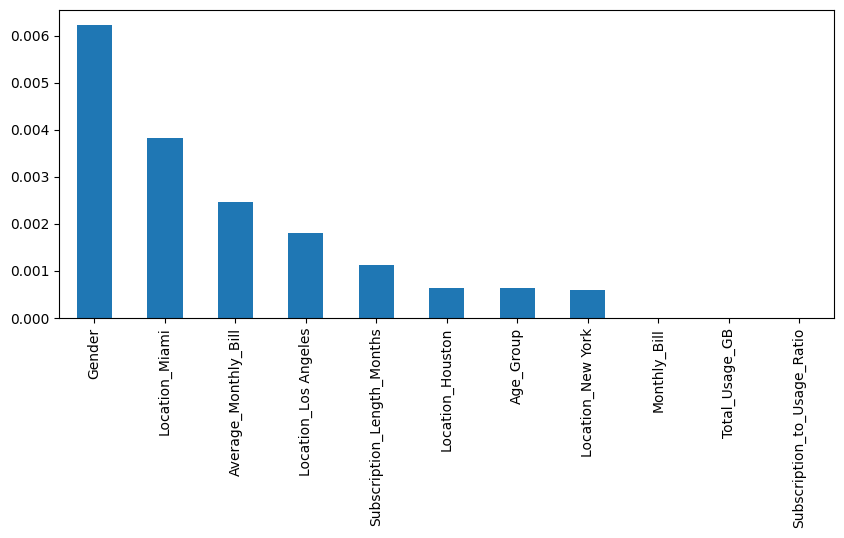

In [44]:
# Visulization

mutual_info.sort_values(ascending = False).plot.bar(figsize = (10,4));

In [45]:
from sklearn.feature_selection import SelectKBest

# Now we will select the top 5 important features.
sel_five_cols = SelectKBest(mutual_info_classif , k = 9)
sel_five_cols.fit(X_train.fillna(0), y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Gender', 'Monthly_Bill', 'Age_Group', 'Subscription_to_Usage_Ratio',
       'Average_Monthly_Bill', 'Location_Houston', 'Location_Los Angeles',
       'Location_Miami', 'Location_New York'],
      dtype='object')

In [46]:
X_train = X_train[['Gender', 'Subscription_Length_Months', 'Total_Usage_GB', 'Age_Group',
       'Subscription_to_Usage_Ratio', 'Average_Monthly_Bill',
       'Location_Houston', 'Location_Los Angeles', 'Location_New York']]

X_test = X_test[['Gender', 'Subscription_Length_Months', 'Total_Usage_GB', 'Age_Group',
       'Subscription_to_Usage_Ratio', 'Average_Monthly_Bill',
       'Location_Houston', 'Location_Los Angeles', 'Location_New York']]

### Model Building


*   Models :-

  > Logistic Regression
    
  > Decision Tree

  > Random Forest

  > K Neighbors

  > AdaBoost

  > Gradient Boost

  > XGBoost

  > SVC

















*   Model Optimization.

*   Model Deployment.




In [48]:
%%time
models = {
    "Logistic Regression": LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    "K Neighbors" : KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    "Gradient Boost" : GradientBoostingClassifier(),
    "XGBoost" : xgb.XGBClassifier(),
    "SVC": SVC()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

#     Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

#     Training Set Performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average = 'weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

#     Test set prediction
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average = 'weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])

    print("Model Performance for Training Set")
    print("Accuracy: {:.4f}".format(model_train_accuracy))
    print("F1 Score: {:.4f}".format(model_train_f1))
    print('Precission: {:.4f}'.format(model_train_precision))
    print("Recall: {:.4f}".format(model_train_recall))
    print("ROC AUC Score: {:.4f}".format(model_train_rocauc_score))

    print("----------------------------------------------------------")

    print("Model Performance for Test Set")
    print("Accuracy: {:.4f}".format(model_test_accuracy))
    print("F1 Score: {:.4f}".format(model_test_f1))
    print('Precission: {:.4f}'.format(model_test_precision))
    print("Recall: {:.4f}".format(model_test_recall))
    print("ROC AUC Score: {:.4f}".format(model_test_rocauc_score))


    print("="*35)
    print("\n")

Logistic Regression
Model Performance for Training Set
Accuracy: 0.5052
F1 Score: 0.4941
Precission: 0.5049
Recall: 0.3566
ROC AUC Score: 0.5047
----------------------------------------------------------
Model Performance for Test Set
Accuracy: 0.5032
F1 Score: 0.4921
Precission: 0.4990
Recall: 0.3541
ROC AUC Score: 0.5021


Decision Tree
Model Performance for Training Set
Accuracy: 1.0000
F1 Score: 1.0000
Precission: 1.0000
Recall: 1.0000
ROC AUC Score: 1.0000
----------------------------------------------------------
Model Performance for Test Set
Accuracy: 0.4945
F1 Score: 0.4946
Precission: 0.4905
Recall: 0.4908
ROC AUC Score: 0.4945


Random Forest
Model Performance for Training Set
Accuracy: 1.0000
F1 Score: 1.0000
Precission: 1.0000
Recall: 1.0000
ROC AUC Score: 1.0000
----------------------------------------------------------
Model Performance for Test Set
Accuracy: 0.4983
F1 Score: 0.4981
Precission: 0.4941
Recall: 0.4791
ROC AUC Score: 0.4981


K Neighbors
Model Performance f

In [49]:
confusion_matrix(y_test, y_test_pred)

array([[6430, 3649],
       [6367, 3554]])

In [50]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.50      0.64      0.56     10079
           1       0.49      0.36      0.42      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.49     20000



In [51]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [52]:
forest.feature_importances_

importance_df = pd.DataFrame ({
    'feature': X_train.columns,
    'importance': forest.feature_importances_
}).sort_values("importance", ascending=False)

In [53]:
importance_df

,feature,importance
5,Average_Monthly_Bill,0.312362
4,Subscription_to_Usage_Ratio,0.256203
2,Total_Usage_GB,0.241575
1,Subscription_Length_Months,0.079300
3,Age_Group,0.056855
0,Gender,0.018819
7,Location_Los Angeles,0.012989
6,Location_Houston,0.011055
8,Location_New York,0.010840


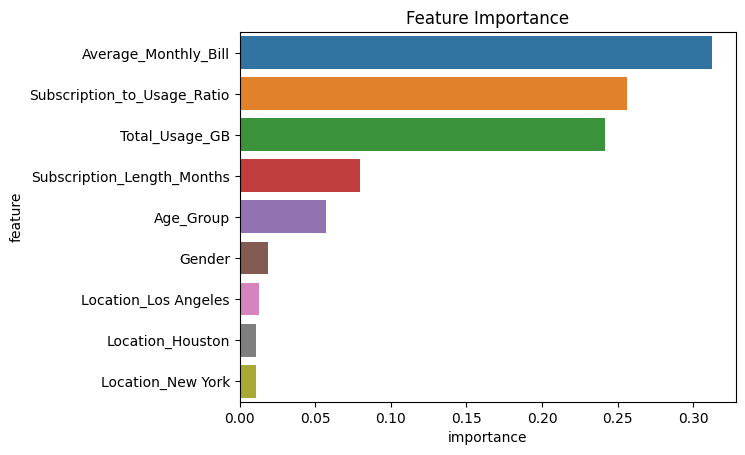

In [54]:
plt.title("Feature Importance")
sns.barplot(data = importance_df.head(15), x='importance', y='feature');

In [55]:
model = DecisionTreeClassifier (max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [56]:
model.score(X_train, y_train)

0.5041875

In [57]:
model.score(X_test, y_test)

0.5048

In [58]:
model.classes_

array([0, 1])

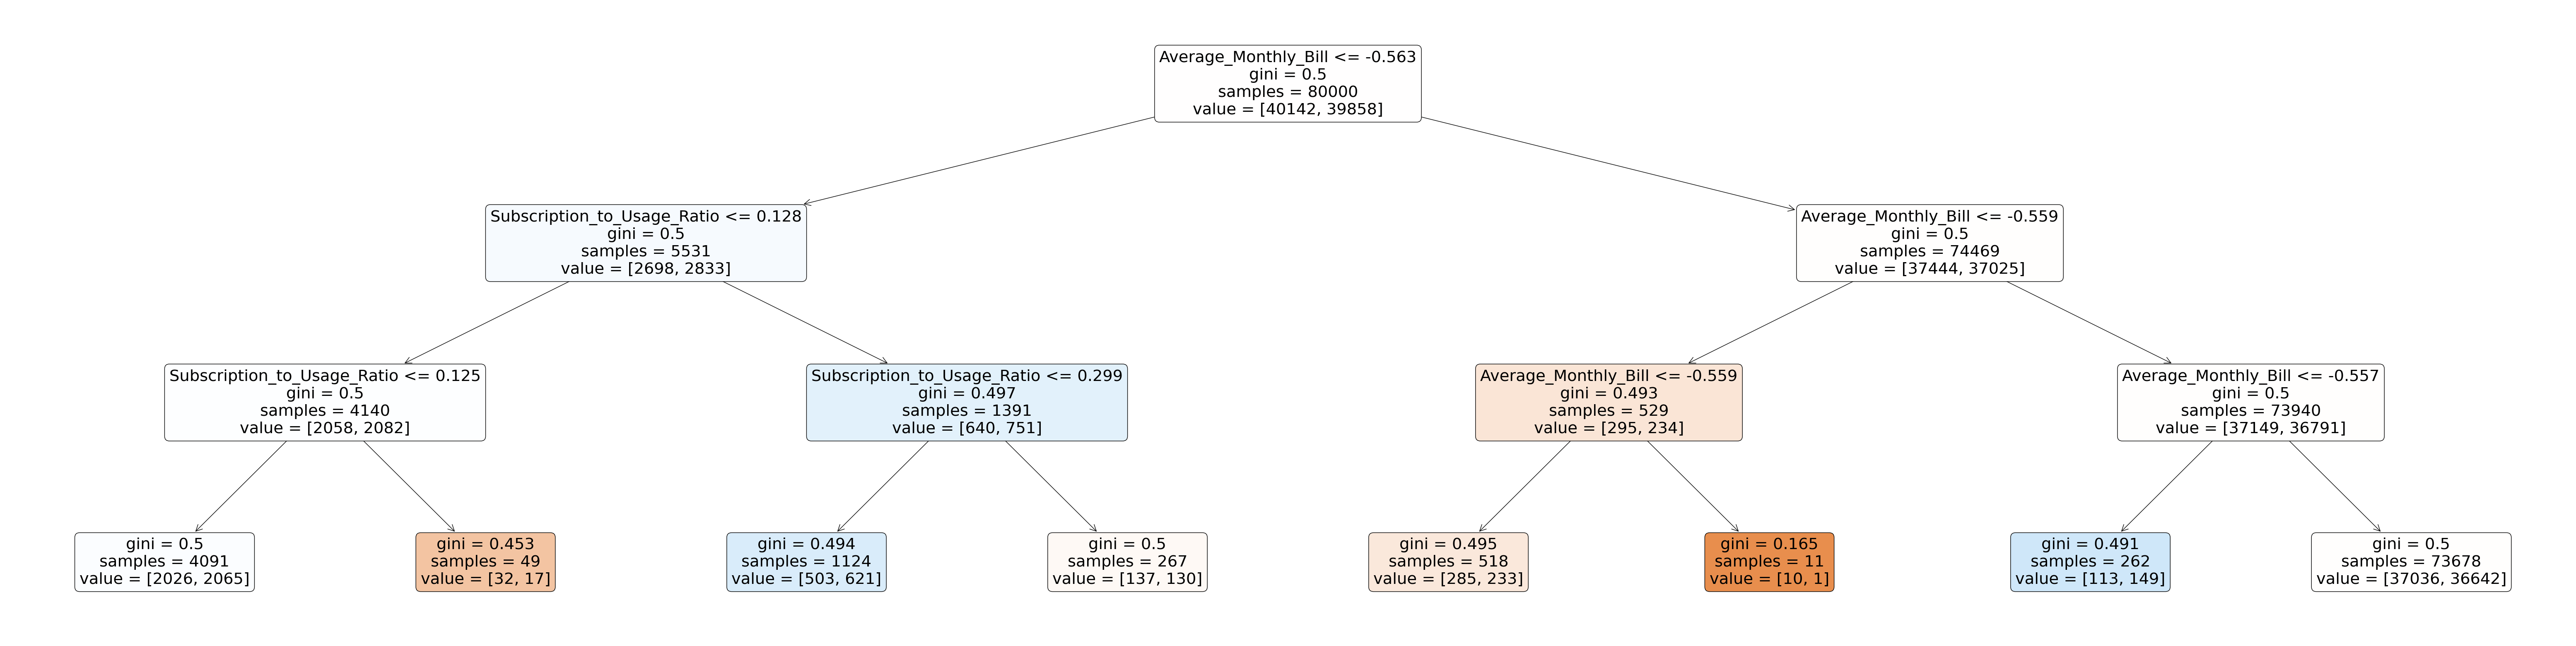

In [59]:
from sklearn.tree import plot_tree, export_text
plt.figure (figsize=(80,20))
plot_tree (model, feature_names=X_train.columns, filled=True,rounded=True, class_names=model.class_weight);

In [60]:
def max_depth_error (md) :  #md means max depth values
    model = DecisionTreeClassifier (max_depth= md, random_state=42)
    model.fit(X_train, y_train)

    train_err = 1 - model.score(X_train, y_train)

    test_err = 1 - model.score (X_test, y_test)

    return {"Max Depth": md, "Training Error": train_err, "Validation Error" : test_err}

In [61]:
errors_df = pd.DataFrame([max_depth_error (md) for md in range (1, 21)])
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.496537,0.49485
1,2,0.496537,0.49485
2,3,0.495812,0.49520
3,4,0.495525,0.49455
4,5,0.493100,0.50275
5,6,0.491287,0.49615
6,7,0.489175,0.49750
7,8,0.485662,0.49895
8,9,0.483300,0.50055
9,10,0.480638,0.49745


In [62]:
model = DecisionTreeClassifier(max_depth=4, random_state=42).fit(X_train, y_train)

# Validation score
model.score(X_test, y_test)

0.50545

In [63]:
model.score(X_train, y_train)


0.504475

In [64]:
model = DecisionTreeClassifier (random_state = 0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [65]:
model.score(X_train, y_train)

0.9999875

In [66]:
model.score(X_test, y_test)

0.4948

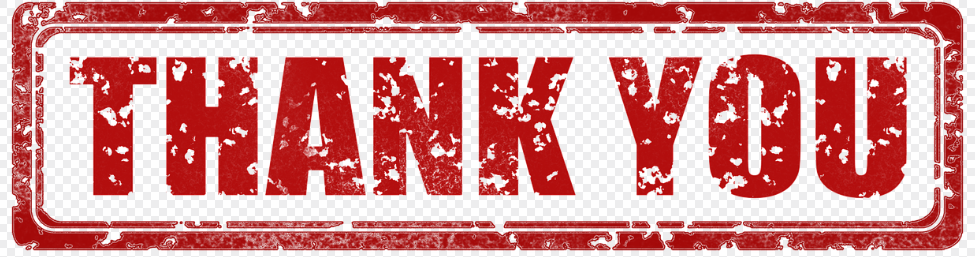